# Survival Analysis

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

## Treatment Group

In [97]:
a = [random.randrange(11) for i in range(105)]
b = [random.randrange(8, 11) for i in range(95)]
a.extend(b)
random.shuffle(a)
unique, counts = np.unique(np.array(a), return_counts=True)
dict(zip(unique, counts))
deaths = []
for i in a:
    if i == 10:
        deaths.append(0)
    else:
        deaths.append(1)

## Control Group

In [93]:
c = [random.randrange(11) for i in range(195)]
b = [random.randrange(8, 11) for i in range(5)]
c.extend(b)
random.shuffle(c)
unique, counts = np.unique(np.array(c), return_counts=True)
dict(zip(unique, counts))
deaths2 = []
for i in c:
    if i == 10:
        deaths2.append(0)
    else:
        deaths2.append(1)

## Kaplan-Meier Estimate

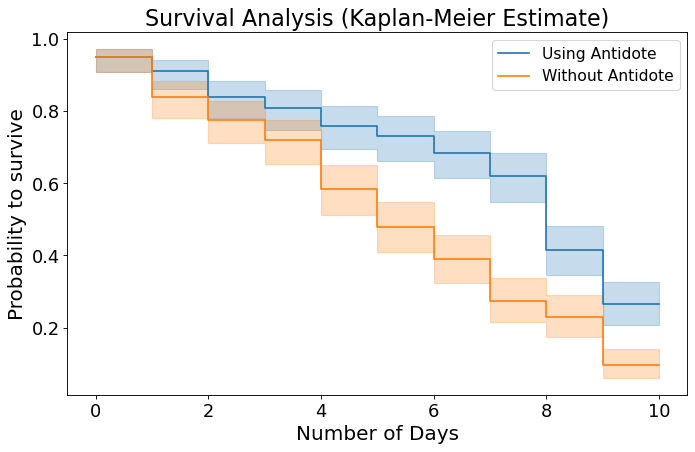

In [118]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
kmf = KaplanMeierFitter() 
kmf.fit(a, deaths, label='Using Antidote')
a1 = kmf.plot() 
kmf.fit(c, deaths2, label='Without Antidote')
kmf.plot(ax=a1)
plt.legend(fontsize=14)
plt.title("Survival Analysis (Kaplan-Meier Estimate)", fontsize=20)
plt.xlabel("Number of Days", fontsize=18)
plt.ylabel("Probability to survive", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('survival.svg', format='svg', bbox_inches='tight')
plt.show()

## Life spans

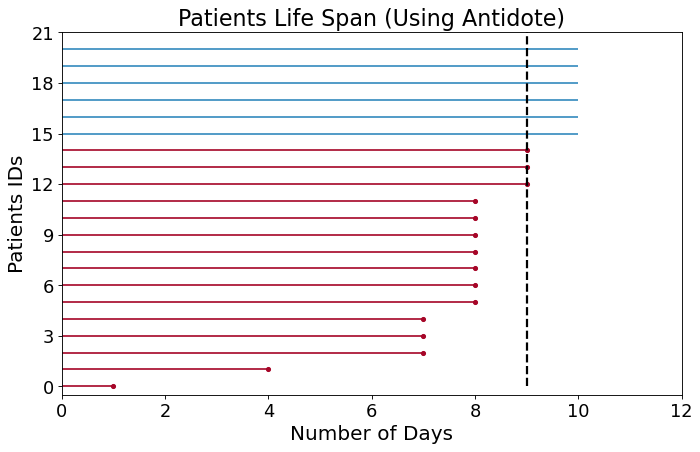

In [119]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plot_lifetimes(np.array(a[:21]), np.array(deaths[:21]))
plt.xlim(0, 12)
plt.vlines(9, 0, 30, lw=2, linestyles='--')
plt.title("Patients Life Span (Using Antidote)", fontsize=20)
plt.xlabel("Number of Days", fontsize=18)
plt.ylabel("Patients IDs", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('survival_span.svg', format='svg', bbox_inches='tight')
plt.show()

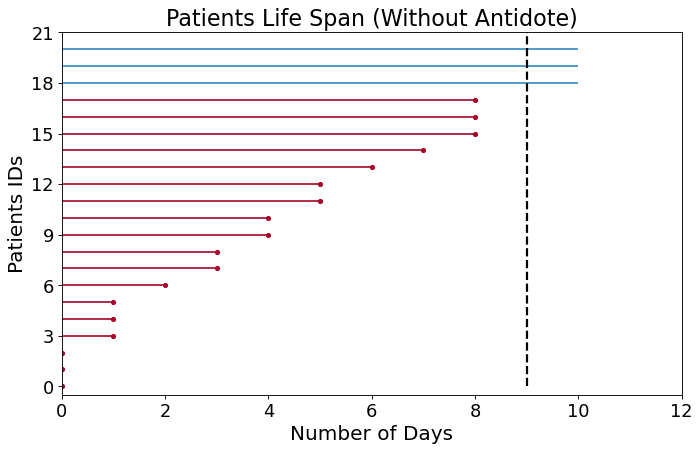

In [120]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plot_lifetimes(np.array(c[:21]), np.array(deaths2[:21]))
plt.xlim(0, 12)
plt.vlines(9, 0, 30, lw=2, linestyles='--')
plt.title("Patients Life Span (Without Antidote)", fontsize=20)
plt.xlabel("Number of Days", fontsize=18)
plt.ylabel("Patients IDs", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('survival_span2.svg', format='svg', bbox_inches='tight')
plt.show()